<a href="https://colab.research.google.com/github/pranaaph/Data-Analysis/blob/main/EDA_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exploratory  Data Analysis  for Hotel Booking**


### **Importing the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

### **Connecting to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Python DataScience
!ls

/content/drive/MyDrive/Colab Notebooks/Python DataScience
'Data Procesing.ipynb'	 EDA_Practice.ipynb   hotel_bookings.csv  'hotel_bookings raw data.csv'


### **Reading the CSV file**

In [ ]:
hotelBookingDataset = pd.read_csv('hotel_bookings raw data.csv')
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [ ]:
hotelDataset =  hotelBookingDataset.copy()

### **Displaying the Top 5 Rows**

In [ ]:
hotelBookingDataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### **Displaying the Last 5 Rows**

In [ ]:
hotelBookingDataset.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


### **Displaying the random 5 Rows**

In [ ]:
hotelBookingDataset.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
91557,City Hotel,0,35,2016,June,26,21,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,B,1,No Deposit,9.0,NaN,0,Transient,102.00,0,1,Check-Out,2016-06-23
77977,City Hotel,1,45,2015,October,44,29,0,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,3.0,NaN,0,Transient,70.00,0,0,Canceled,2015-09-30
91493,City Hotel,0,62,2016,June,26,19,2,2,2,0.0,0,BB,BEL,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,NaN,0,Transient,95.85,0,0,Check-Out,2016-06-23
62403,City Hotel,1,62,2017,January,2,12,2,3,2,0.0,0,BB,RUS,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,88.40,0,0,Canceled,2016-11-12
18659,Resort Hotel,0,5,2015,November,48,25,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,94.0,0,Transient,25.00,0,0,Check-Out,2015-11-26


### **Displaying the Shape of the dataset**

In [ ]:
hotelBookingDataset.shape

(119390, 32)

In [ ]:
print ("Number of rows in the given dataset    : ",dataset.shape[0])
print ("Number of columns in the given dataset : ",dataset.shape[1])

Number of rows in the given dataset    :  119390
Number of columns in the given dataset :  32


### **More Information about the dataset**

In [ ]:
hotelBookingDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Inference: The dataset consists of 32 columns with 119390 entries and  there are 16 integer type of variables and 12 object data variables and 4 float type of variables.

### **Checking for null values in the dataset**

In [ ]:
hotelBookingDataset.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Inference: There are three variables such as country , agent and company  has missing values in the given dataset.

### **Checking for duplicate values in the dataset**

In [ ]:
duplicateValues=hotelBookingDataset.duplicated()
print("Total no of duplicate values = ",(duplicateValues.sum()))

Total no of duplicate values =  31994


### Inference: There are 31994 rows having duplicated values but as there is no unique code or unique identification present we cannot say that this is the same person so we will not remove the duplicates.

### **Removing the Duplicate values**

In [ ]:
# Dropping duplicate values
hotelDataset.drop_duplicates(inplace = True)

In [ ]:
duplicateValues=hotelDataset.duplicated()
print("Total no of duplicate values = ",(duplicateValues.sum()))

Total no of duplicate values =  0


### Inference: The duplicated values are dropped in the given dataset.

### **Handling Missing Data**

In [ ]:
hotelDataset['children'].mean()
hotelDataset['children'].fillna(hotelDataset['children'].mean(),inplace = True)

In [ ]:
hotelDataset['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [ ]:
 hotelDataset['company'].fillna(0 , inplace = True)

In [ ]:
 hotelDataset['agent'].fillna(0 , inplace = True)

In [ ]:
hotelDataset['country'].fillna('others' , inplace = True)

In [ ]:
hotelDataset.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### Inference:
    The missing values in the children variable is filled with mean value.
    The missing Values in the country avriable is filled with 'others'
    The missing Values in the comapny and agent variables is filled with 0.

    Therefore, there is no missing values in the given dataset

### **Converting columns to appropriate datatypes.**

In [ ]:

# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
hotelDataset[['children', 'company', 'agent']] = hotelDataset[['children', 'company', 'agent']].astype('int64')

In [ ]:
# changing datatype of column 'reservation_status_date' to data_type.
hotelDataset['reservation_status_date'] = pd.to_datetime(hotelDataset['reservation_status_date'], format = '%Y-%m-%d')

In [ ]:
hotelDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  b

### **Overall Statistics for the dataset**

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


### **Seperating the dataset into numerical variable and Categorical Variables**

In [ ]:
numericVariables= hotelBookingDataset.select_dtypes(include=[np.number])
categoricalVariables = hotelBookingDataset.select_dtypes(exclude=[np.number])

In [ ]:

categoricalVariables.shape

(119390, 12)

In [ ]:
print ("Number of rows    : ",categoricalVariables.shape[0])
print ("Number of columns : ",categoricalVariables.shape[1])

Number of rows    :  119390
Number of columns :  12


In [ ]:
numericVariables.shape

(119390, 20)

In [ ]:
print ("Number of rows    : ",numericVariables.shape[0])
print ("Number of columns : ",numericVariables.shape[1])

Number of rows    :  119390
Number of columns :  20


In [ ]:

numericVariables.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [ ]:
categoricalVariables.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

### Inference: The dataset consists of 12 categorical variables and 30 continuous variables.

### **Handling Categorical Data**



In [ ]:
hotelBookingDataset['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
CHN      999
POL      919
ISR      669
RUS      632
NOR      607
ROU      500
FIN      447
DNK      435
AUS      426
AGO      362
LUX      287
MAR      259
TUR      248
HUN      230
ARG      214
JPN      197
CZE      171
IND      152
KOR      133
GRC      128
DZA      103
SRB      101
HRV      100
MEX       85
EST       83
IRN       83
LTU       81
ZAF       80
BGR       75
NZL       74
COL       71
UKR       68
MOZ       67
CHL       65
SVK       65
THA       59
SVN       57
ISL       57
LVA       55
ARE       51
CYP       51
TWN       51
SAU       48
PHL       40
TUN       39
SGP       39
IDN       35
NGA       34
EGY       32
URY       32
LBN       31
PER       29
HKG       29
MYS       28
ECU       27
VEN       26
BLR       26
CPV       24
GEO       22
JOR       21
KAZ       19
CRI       19

### **Checking for Skewness in the dataset**

In [ ]:
hotelBookingDataset.skew()

<ipython-input-34-8035be43cde7>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.skew()


is_canceled                        0.536678
lead_time                          1.346550
arrival_date_year                 -0.232583
arrival_date_week_number          -0.010014
arrival_date_day_of_month         -0.002000
stays_in_weekend_nights            1.380046
stays_in_week_nights               2.862249
adults                            18.317805
children                           4.112590
babies                            24.646545
is_repeated_guest                  5.326315
previous_cancellations            24.458049
previous_bookings_not_canceled    23.539800
booking_changes                    6.000270
agent                              1.089386
company                            0.601600
days_in_waiting_list              11.944353
adr                               10.530214
required_car_parking_spaces        4.163233
total_of_special_requests          1.349189
dtype: float64

### Inference:  In the given dataset, three variables are negatively skewed where others are positively skewed.The variables such as babies , previous cancellations and previous_bookings_not_canceled has maximum skewness.

<ipython-input-35-c3b6a3b5b686>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['adults'])


18.31757461595262


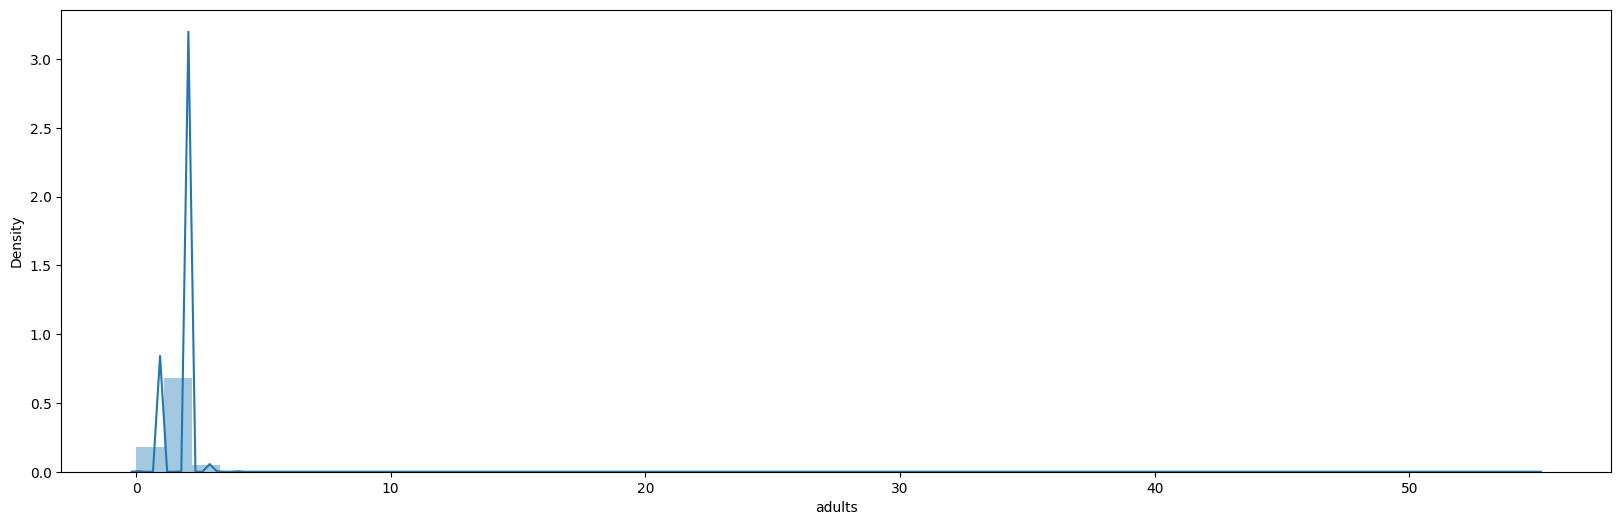

In [ ]:

  print (skew(hotelBookingDataset['adults']))
  plt.figure(figsize=(20, 6))
  sns.distplot(hotelBookingDataset['adults'])
  plt.show()

### **Checking for Outliers in the datasets**

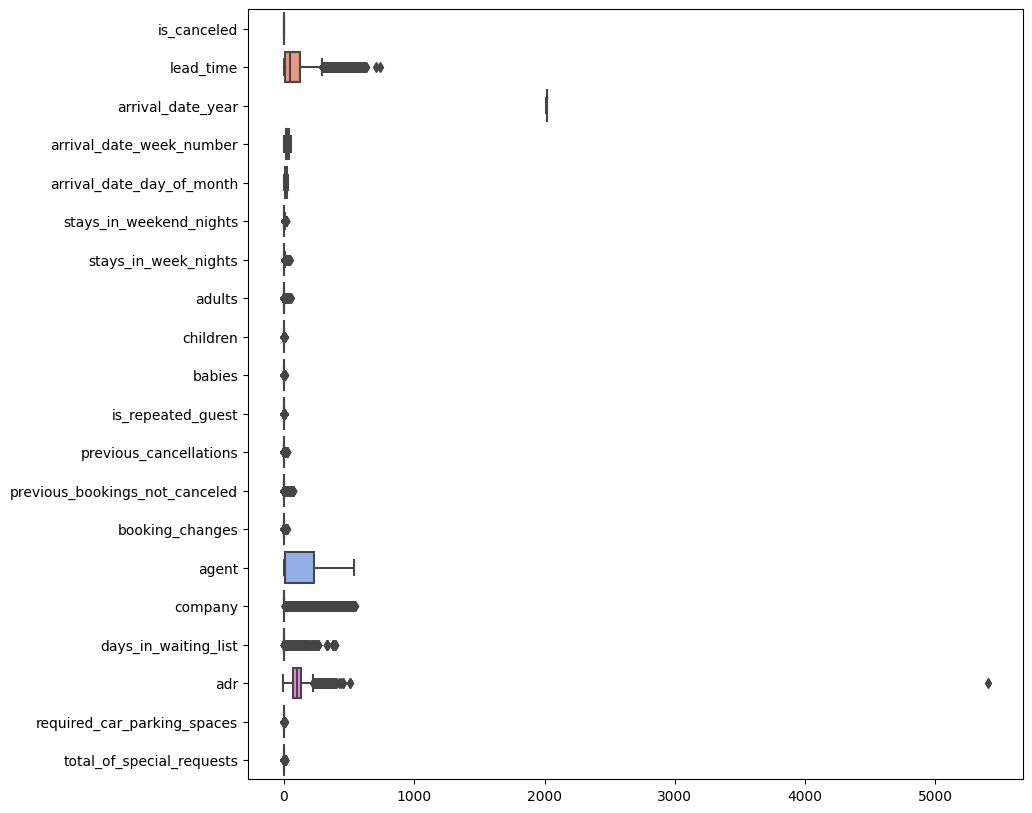

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(hotelDataset,orient='h')
plt.show()


In [ ]:
data = hotelDataset['lead_time'] > 650
filtered_data = hotelDataset[data]
filtered_dataframe = pd.DataFrame(filtered_data)
filtered_dataframe.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
4182,Resort Hotel,0,709,2016,February,9,25,8,20,2,0,0,HB,GBR,Direct,Direct,0,0,0,E,E,2,No Deposit,0,0,0,Transient,68.0,0,0,Check-Out,2016-03-24


In [ ]:
hotelDataset.drop(hotelDataset[hotelDataset['lead_time'] > 650].index, inplace = True)

<Axes: xlabel='lead_time'>

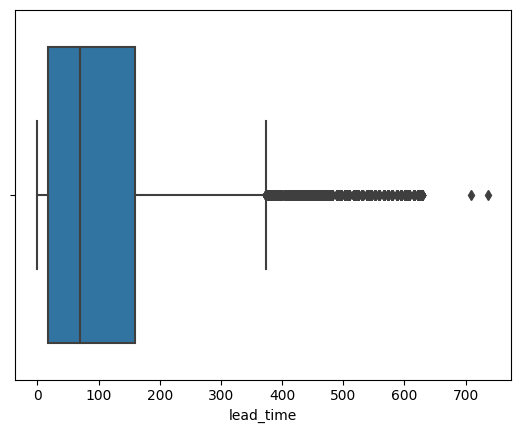

In [ ]:
sns.boxplot(hotelBookingDataset,x='lead_time')

<Axes: xlabel='lead_time'>

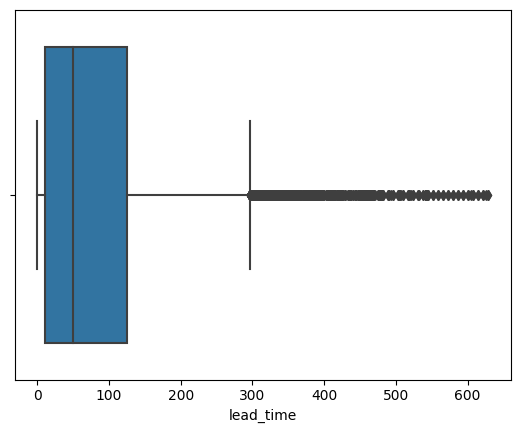

In [ ]:
sns.boxplot(hotelDataset,x='lead_time')

### **UniVariate Analysis**

**Agent who makes most no. of bookings.**

In [ ]:
# Calculate the value counts for the 'agent' variable
agentCounts = hotelDataset['agent'].value_counts()
print (agentCounts)

9      28759
240    13028
0      12191
14      3349
7       3300
250     2779
241     1644
28      1502
8       1383
1       1232
6       1117
40       986
314      844
242      722
83       614
85       524
243      477
171      402
27       395
3        363
22       345
11       318
15       303
196      281
177      277
96       272
138      257
37       225
16       220
229      218
5        216
10       214
21       199
42       194
115      192
156      187
26       187
175      182
195      181
86       180
273      179
251      175
134      168
143      163
298      160
152      156
168      153
19       151
315      151
12       133
2        129
147      128
95       125
410      121
20       117
146      112
142      111
30       106
94       103
330       99
89        90
29        84
52        82
191       82
69        81
159       80
36        77
13        77
17        76
464       75
39        74
75        70
132       68
339       68
38        67
98        66
185       65

In [ ]:
# Select the top 10 performing agents
topAgents = agentCounts.head(10)
print (topAgents)

9      28759
240    13028
0      12191
14      3349
7       3300
250     2779
241     1644
28      1502
8       1383
1       1232
Name: agent, dtype: int64


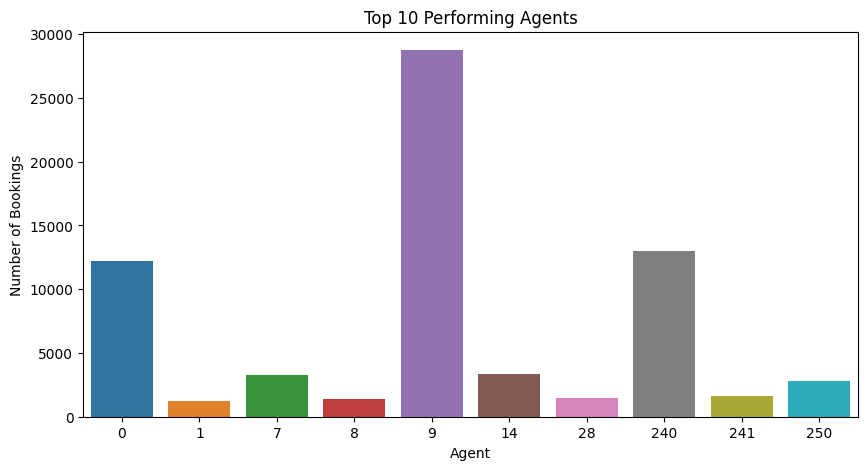

In [ ]:
# Creating a barplot
plt.figure(figsize=(10, 5))
sns.barplot(x=topAgents.index, y=topAgents.values)
plt.xlabel('Agent')
plt.ylabel('Number of Bookings')
plt.title('Top 10 Performing Agents')
plt.show()

### Inference: The **Agent 9** makes more number of booking

**The Room type which has more demand**

In [ ]:
mostPerferedRoomType = hotelDataset['reserved_room_type'].value_counts()

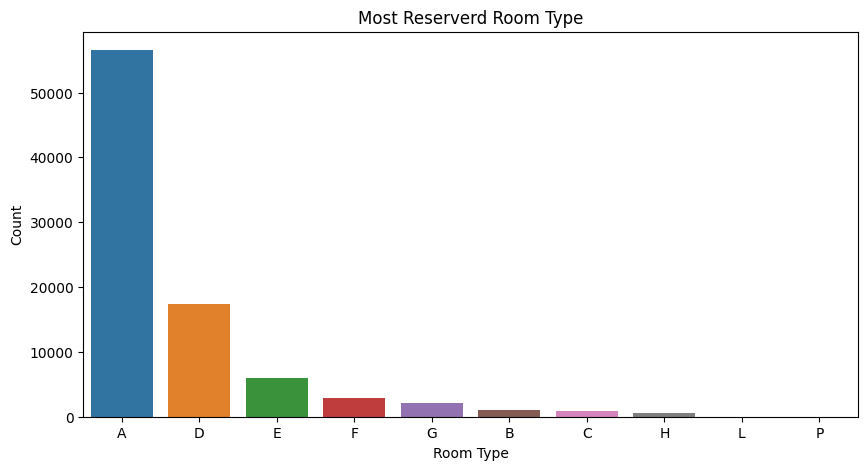

In [ ]:
# Creating a barplot
plt.figure(figsize=(10, 5))
sns.barplot(x=mostPerferedRoomType.index, y=mostPerferedRoomType.values)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Most Reserverd Room Type')
plt.show()

### Inference: The Room Type **A** is mostly perfered

**The meal type which is highly prefered by the customers**

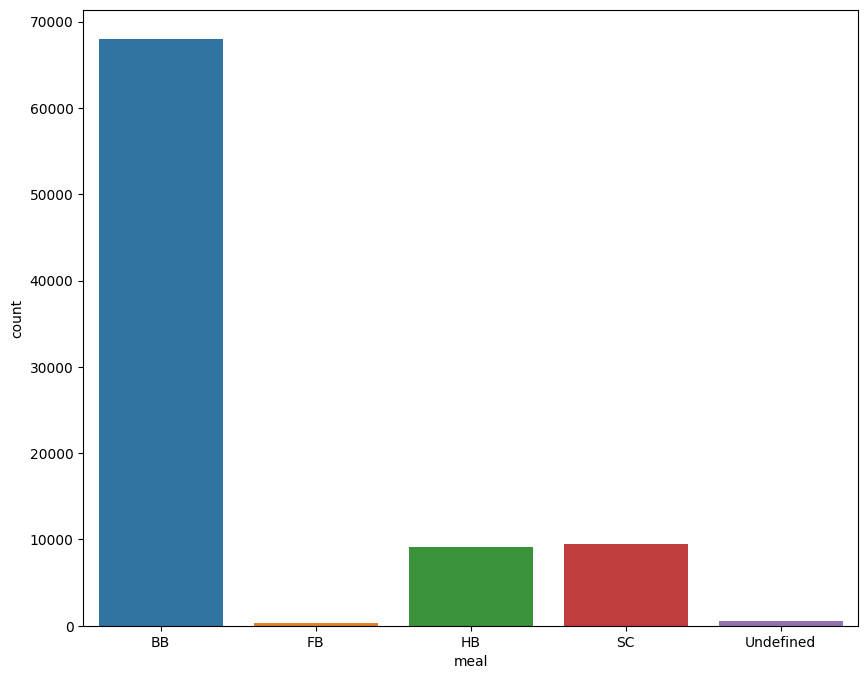

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(x = hotelDataset['meal'])
plt.show()

### Inference: The Meal  **BB** is mostly perfered by the customers.

**Percentage of bookings in each hotel**

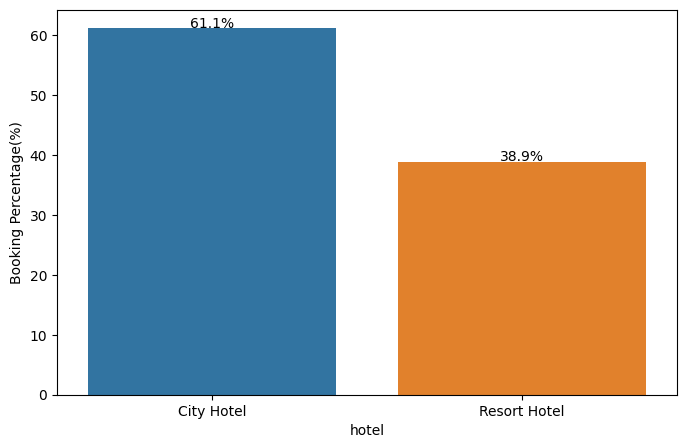

In [ ]:
groupHotel = hotelDataset.groupby('hotel')
bookingPercentage = (groupHotel.size() / hotelDataset.shape[0]) * 100
plt.figure(figsize=(8, 5))
plot = sns.barplot(x=bookingPercentage.index, y=bookingPercentage.values)
for i, p in enumerate(bookingPercentage):
    plot.text(i, p + 0.1, f"{p:.1f}%", ha='center')
plt.ylabel('Booking Percentage(%)')
plt.show()


### Inference: The **City Hotel has 61.1%** booking percentage and **Resort Hotel has 38.9%**. Hence, the city hotel has more booking percentage than resort hotel.

### **BiVariate Analysis**

**The hotel which make more revenue**

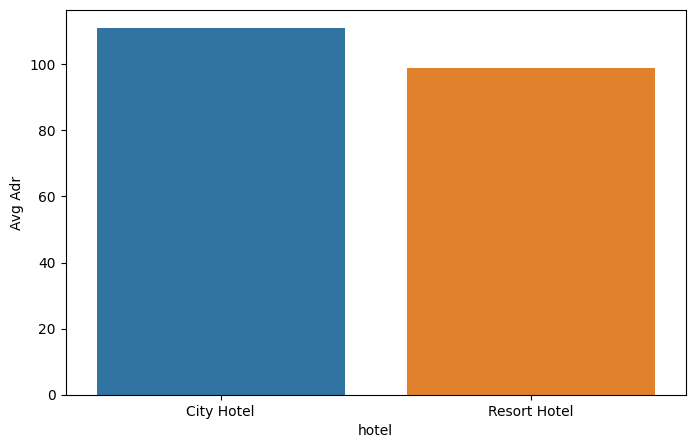

In [ ]:
averageAdr = groupHotel['adr'].agg(np.mean)
plt.figure(figsize=(8, 5))
sns.barplot(x=averageAdr.index, y=averageAdr.values)
plt.ylabel('Avg Adr')
plt.show()

# Inference: Avg adr of City hotel is slightly higher than that of Resort hotel. Hence, City hotel seems to be making slightly more revenue.